# Project Title : Vlib (Bike rental)

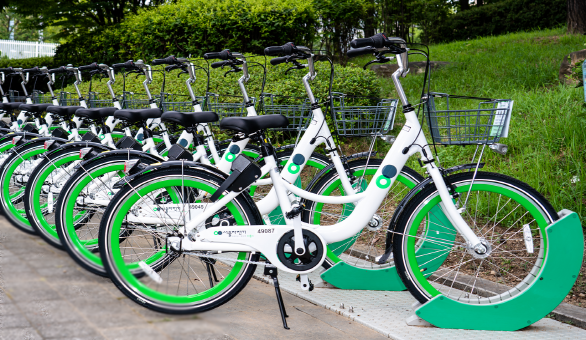

In [7]:
from IPython.display import Image
Image(filename='bi.png')

In [ ]:
import pylab
import calendar

import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import math
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image


pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Project Overview : 
## Bike share systems are a way to rent bikes where the process of obtaining membership, renting and returning bikes is automated through a network of kiosks located throughout the city. Through these systems, people can rent a bike from one location and return it to another location based on their needs. Currently, there are more than 500 bike share programs around the world.


### datetime: Date and time in timestamp
### season: 4 = summer, 3 = spring, 2 = autumn, 1 = winter
### holiday: If considered as vacation then 1 otherwise 0
### workingday: If the day is neither a weekend nor a vacation day

## weather:
### 1: Clear, Few clouds, Partly cloudy, Partly cloudy
### 2: Fog + clouds, Fog + broken clouds, Fog + some clouds, Fog
### 3: Light snow, light rain + thunderstorm + scattered clouds, light rain + scattered clouds
### 4: Heavy rain + ice vanes + thunderstorm + mist, snow + fog

### temp: temperature in degrees Celsius
### atemp: temperature felt in degrees Celsius
### humidity: relative humidity
### windspeed: wind speed
### casual: number of non-subscribed users
### registered: number of subscribed users
### count: total number of users

In [2]:
df = pd.read_csv("vlib.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [40]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [3]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
# df.isnull().sum()
for i in df.columns:
    print(i," : ",df[i].isnull().sum())

datetime  :  0
season  :  0
holiday  :  0
workingday  :  0
weather  :  0
temp  :  0
atemp  :  0
humidity  :  0
windspeed  :  0
casual  :  0
registered  :  0
count  :  0


In [3]:
list_variables = ["datetime","season","weather","holiday","workingday"]

In [4]:
"2011-01-01 00:00:00".split()

['2011-01-01', '00:00:00']

In [5]:
df["date"] = df.datetime.apply(lambda x : x.split()[0])
df["date"].head()

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: date, dtype: object

In [6]:
df["hour"] = df.datetime.apply(lambda x : x.split()[1])
df["hour"].head()

0    00:00:00
1    01:00:00
2    02:00:00
3    03:00:00
4    04:00:00
Name: hour, dtype: object

In [7]:
df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(":")[0])
df["hour"].head()

0    00
1    01
2    02
3    03
4    04
Name: hour, dtype: object

In [8]:
datetime.strptime("2011-01-01","%Y-%m-%d").weekday()

5

In [9]:
calendar.day_name[datetime.strptime("2011-01-01","%Y-%m-%d").weekday()]

'Saturday'

In [10]:
df["weekday"] = df.date.apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])
df["month"] = df.date.apply(lambda x : calendar.month_name[datetime.strptime(x,"%Y-%m-%d").month])

In [11]:
df["weekday"].head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: weekday, dtype: object

In [12]:
df["month"].head()

0    January
1    January
2    January
3    January
4    January
Name: month, dtype: object

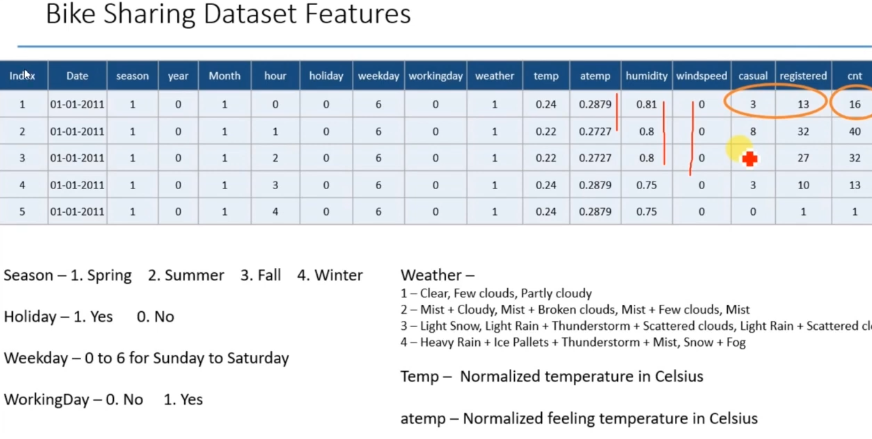

In [22]:
Image(filename='vlib.png')

In [13]:
dictionnaire_saisons = {2: "Spring", 3 : "Summer", 4 : "Fall", 1 :"Winter" }
df["season"] = df.season.map(dictionnaire_saisons)

df["weather"] = df.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [14]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [15]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]

for var in categoryVariableList:
    df[var] = df[var].astype("category")

In [16]:
df=df.drop(["datetime"],axis=1)

In [17]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  date        10886 non-null  object  
 12  hour        10886 non-null  category
 13  weekday     10886 non-null  category
 14  month       10886 non-null  category
dtypes: category(7), float64(3), int64(4), object(1)
memory usage: 757.0+ KB


[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Box Plot On Count')]

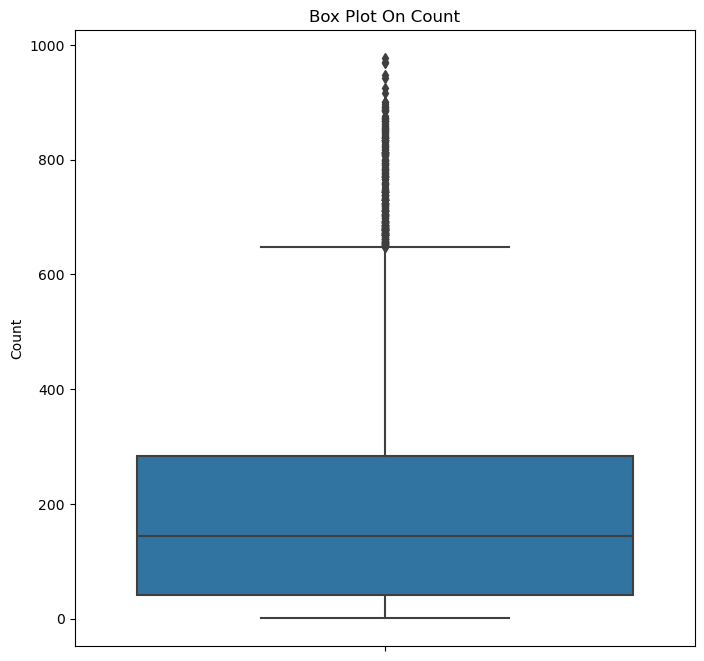

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="count",orient="v",ax=axes)

axes.set(ylabel='Count',title="Box Plot On Count")

[Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Season')]

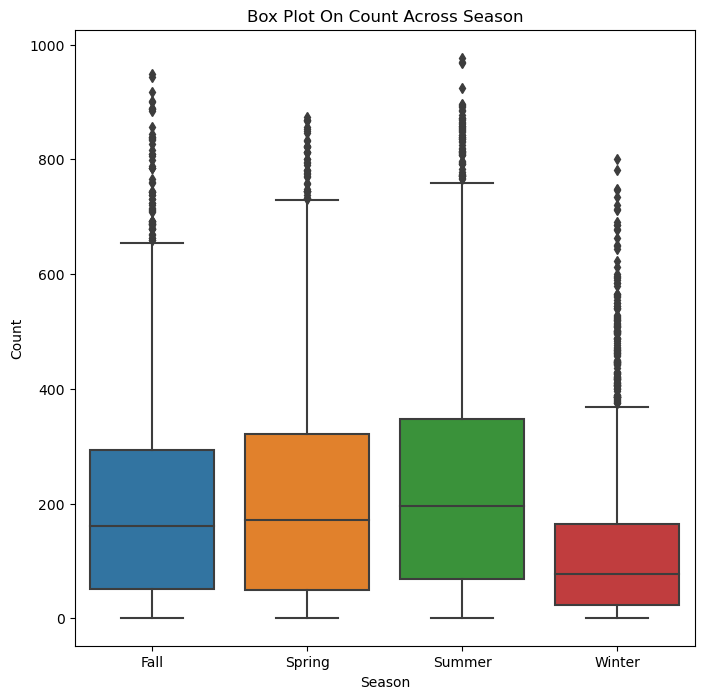

In [30]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="count",x="season",orient="v",ax=axes)
axes.set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Hour Of The Day')]

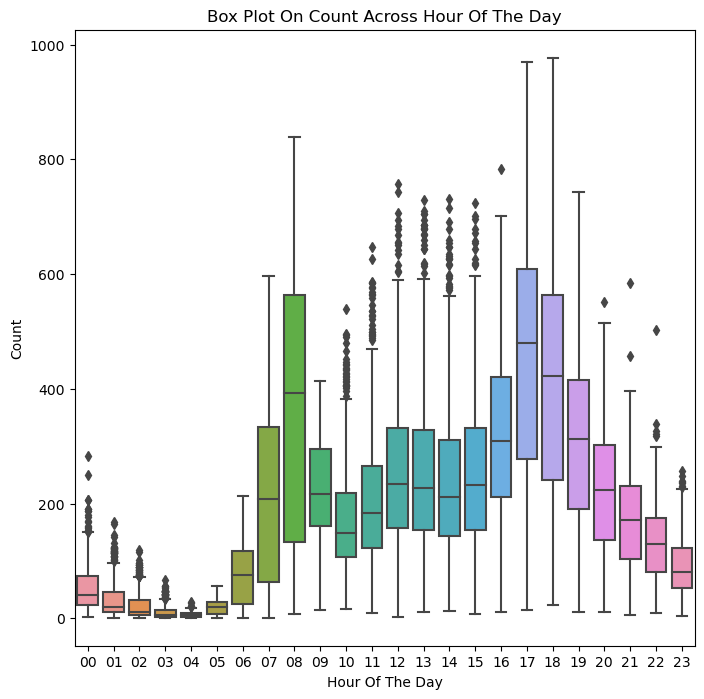

In [31]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="count",x="hour",orient="v",ax=axes)
axes.set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

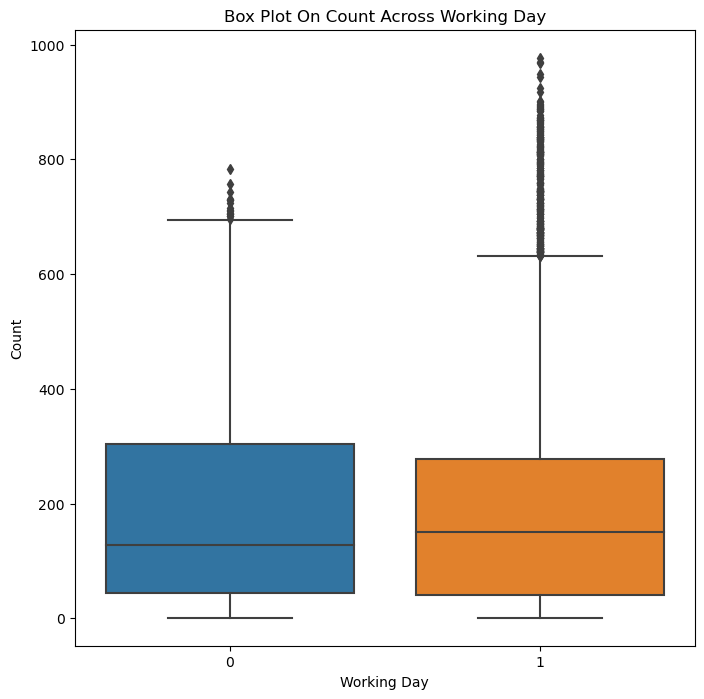

In [32]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="count",x="workingday",orient="v",ax=axes)
axes.set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

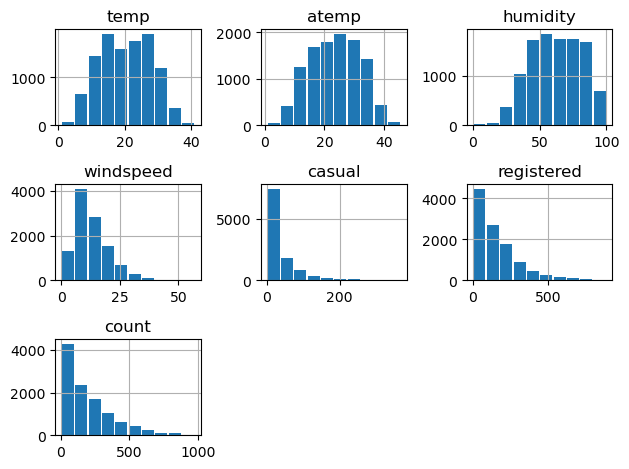

In [33]:
df.hist(rwidth=0.9)
plt.tight_layout()

visualise continuous features vs cnt (y)

plt.tight_layout() : fix distribution

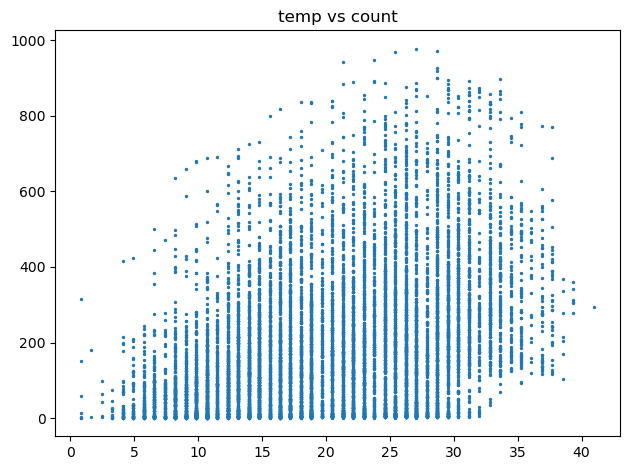

In [35]:

plt.title('temp vs count')
plt.scatter(df['temp'],df['count'],s=2)
plt.tight_layout()


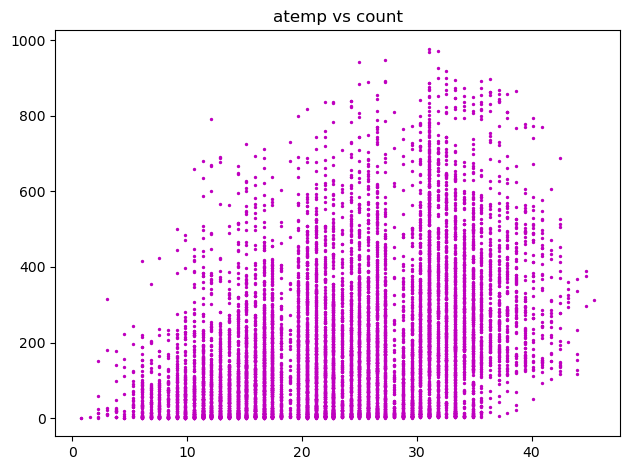

In [37]:
plt.title('atemp vs count')
plt.scatter(df['atemp'],df['count'],s=2,c='m')
plt.tight_layout()

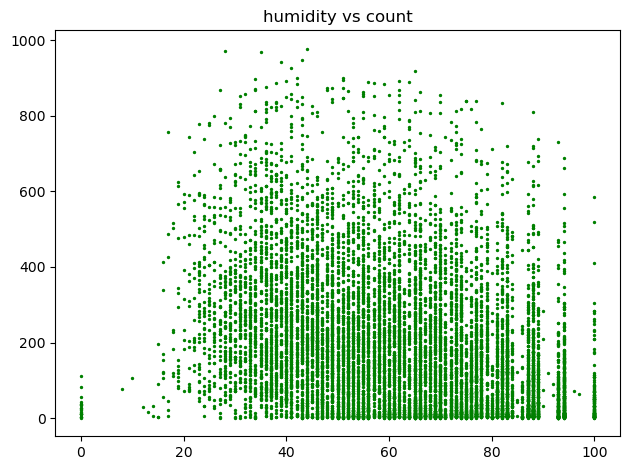

In [38]:
plt.title('humidity vs count')
plt.scatter(df['humidity'],df['count'],s=2,c='g')
plt.tight_layout()

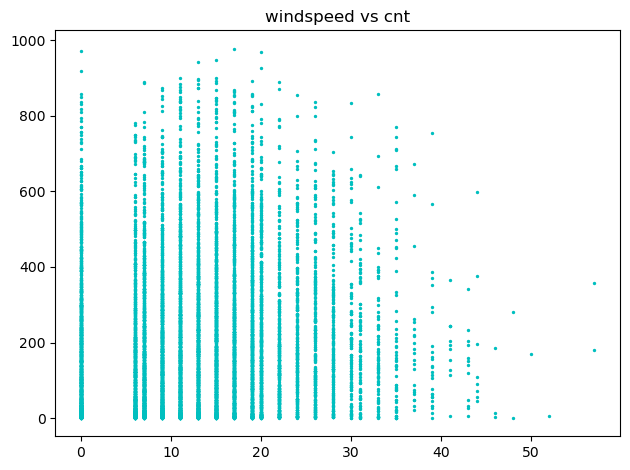

In [39]:

plt.title('windspeed vs cnt')
plt.scatter(df['windspeed'],df['count'],s=2,c='c')
plt.tight_layout()

In [23]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [24]:
df["season"].unique()

['Winter', 'Spring', 'Summer', 'Fall']
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']

Check for outliers

In [25]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [26]:
df['count'].quantile([0.01,.05,.15,.5,.95,.99])

0.01      2.00
0.05      5.00
0.15     16.00
0.50    145.00
0.95    563.75
0.99    774.15
Name: count, dtype: float64

0,99 = 782.22  !=  max = 977  ===> data more than 0.99 are outliers 

In [27]:
df.shape[0] - df[np.abs(df["count"] - df["count"].mean()) <= (3 * df["count"].std())].shape[0]

147

In [28]:
df_without_outliers = df[
    np.abs(df["count"] - df["count"].mean()) <= (3 * df["count"].std())
] 

In [29]:
print ("Shape Of The Before Ouliers: ",df.shape)
print ("Shape Of The After Ouliers: ",df_without_outliers.shape)

Shape Of The Before Ouliers:  (10886, 15)
Shape Of The After Ouliers:  (10739, 15)


<Axes: >

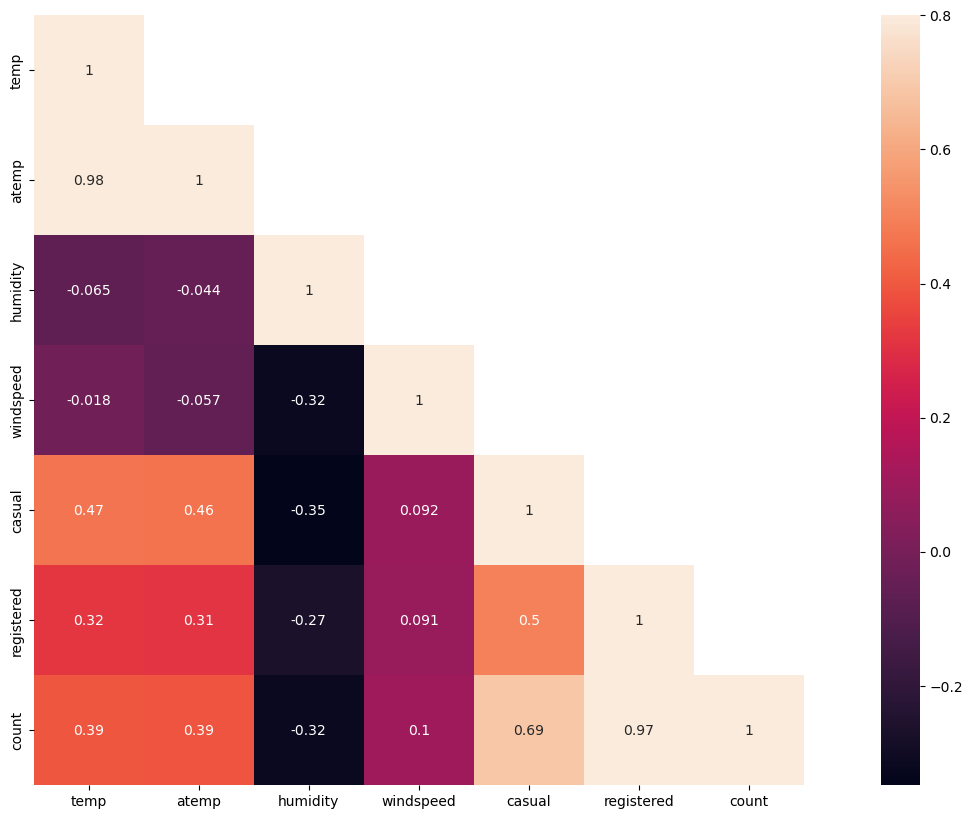

In [30]:
corrMatt = df[['temp','atemp','humidity','windspeed','casual','registered','count']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<Axes: xlabel='registered', ylabel='count'>

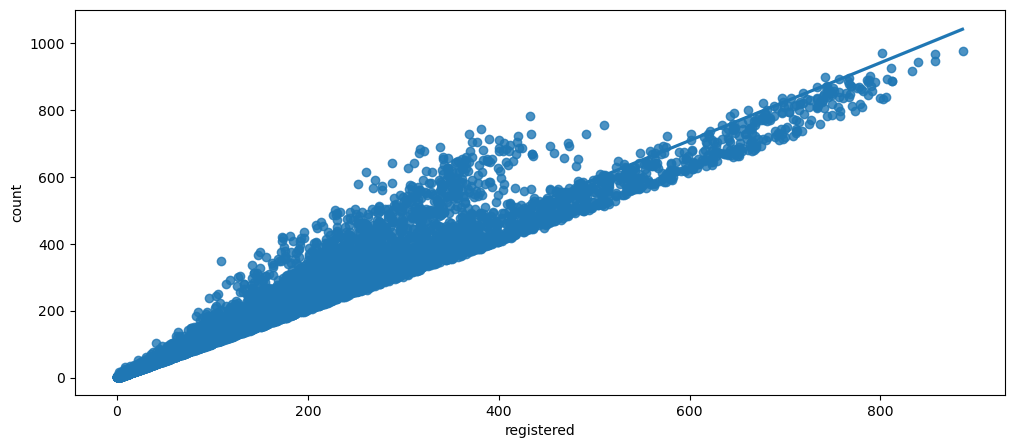

In [31]:
fig,ax = plt.subplots()
fig.set_size_inches(12, 5)
sn.regplot(x="registered", y="count", data=df,ax=ax)

In [32]:
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 1.0, 'Average Count By Month')]

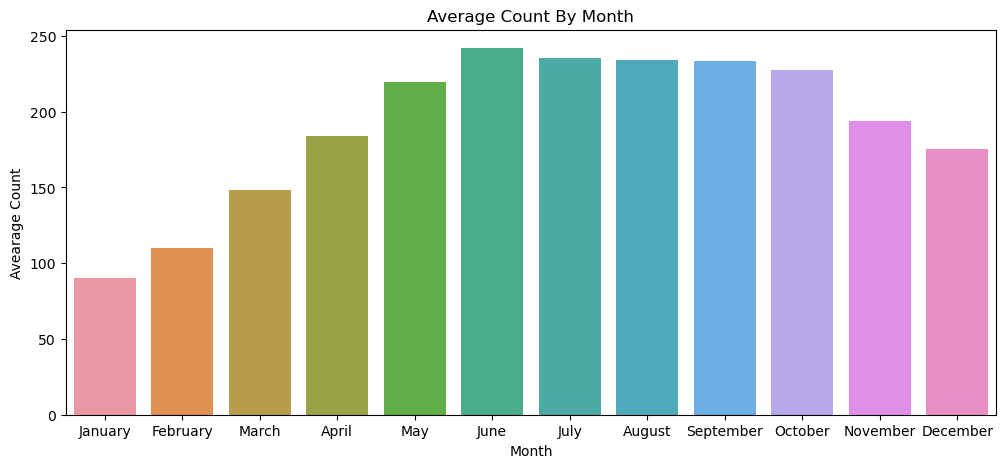

In [64]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)

sn.barplot(data=monthAggregated,x="month",y="count",ax=ax,order=sortOrder)
ax.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

In [33]:
hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

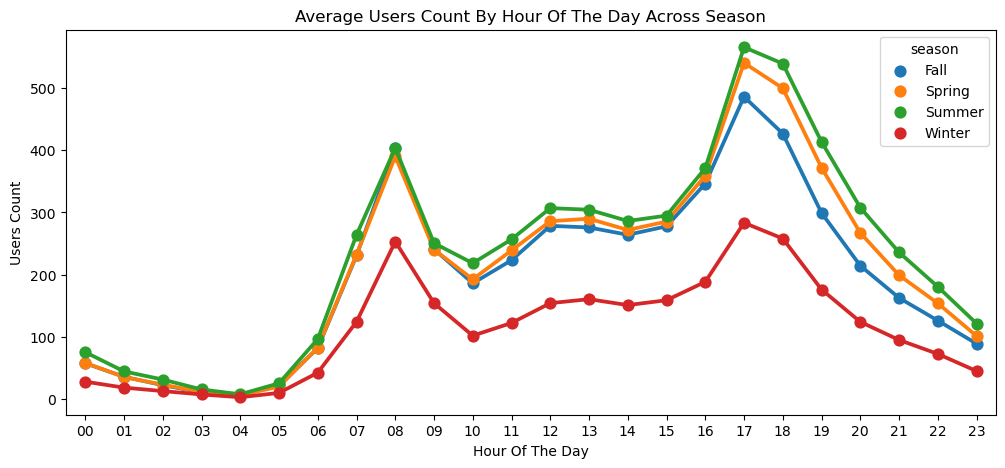

In [34]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

In [35]:
hourAggregated = pd.DataFrame(df.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekdays'),
 None]

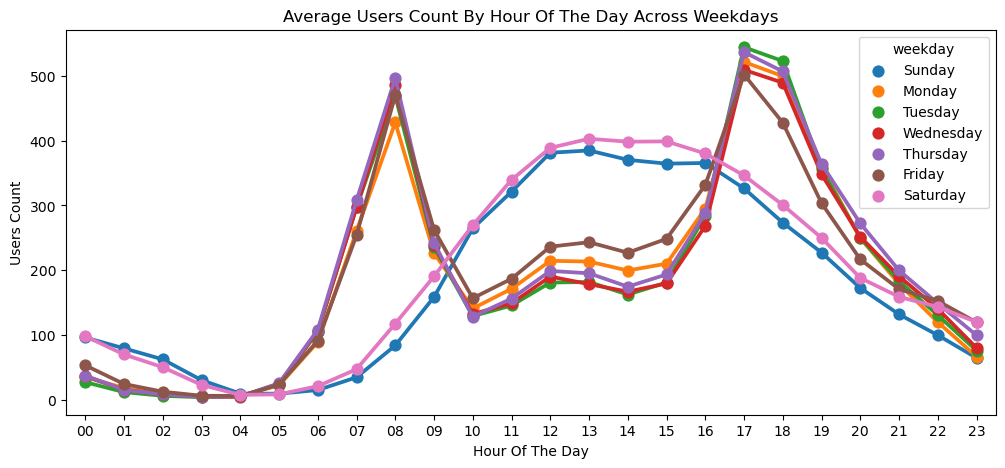

In [36]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)

sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

In [37]:
hourTransformed = pd.melt(df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
hourAggregated.head()

,hour,variable,value
0,00,casual,10.312088
1,00,registered,44.826374
2,01,casual,6.513216
3,01,registered,27.345815
4,02,casual,4.819196


[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

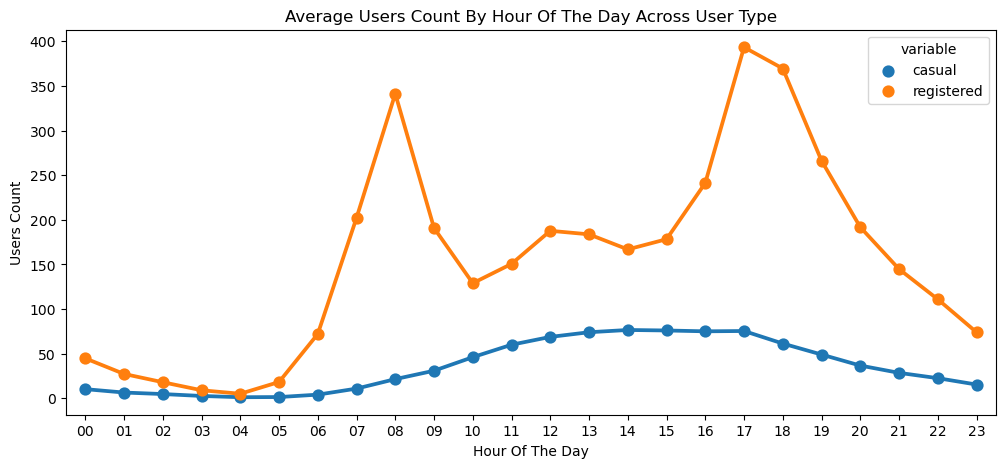

In [38]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)

sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

In [39]:
dropFeatures = ["casual","date","registered"]
df = df.drop(dropFeatures, axis=1)

In [40]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,weekday,month
0,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,16,00,Saturday,January
1,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,40,01,Saturday,January
2,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,32,02,Saturday,January
3,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,13,03,Saturday,January
4,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,1,04,Saturday,January


In [41]:
df = pd.get_dummies(df,columns=["holiday"])
df = pd.get_dummies(df,columns=["weekday"])
df = pd.get_dummies(df,columns=["month"])
df = pd.get_dummies(df,columns=["season"])
df = pd.get_dummies(df,columns=["weather"])
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 36 columns):
 #   Column                                                                                            Non-Null Count  Dtype   
---  ------                                                                                            --------------  -----   
 0   workingday                                                                                        10886 non-null  category
 1   temp                                                                                              10886 non-null  float64 
 2   atemp                                                                                             10886 non-null  float64 
 3   humidity                                                                                          10886 non-null  int64   
 4   windspeed                                                                                         10886 non-null  floa

------------------------------

## Creating Model

In [43]:
import sklearn
from sklearn.model_selection import train_test_split

X = df.drop('count', axis=1)
Y = df['count']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1234)

In [44]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(8708, 35) (2178, 35)
(8708,) (2178,)


In [45]:
from sklearn import metrics

def rmse(y, y_):
    return np.sqrt(np.mean((y-y_)**2))

def mae(y, y_):
    return np.mean(np.abs(y-y_))

In [46]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy = "mean")

dummy_regr.fit(X_train, Y_train)
y_pred = dummy_regr.predict(X_test)
print("R2: ", metrics.r2_score(Y_test, y_pred))
print("MAE: ", mae(Y_test, y_pred))

R2:  -0.0001091323812494327
MAE:  140.67305071426674


In [47]:
from sklearn.linear_model import LinearRegression

lModel = LinearRegression()
lModel.fit(X=X_train, y=Y_train)
y_pred = lModel.predict(X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
print("MAE: ", mae(Y_test, y_pred))

R2:  0.36341724707335255
MAE:  105.39556770202668


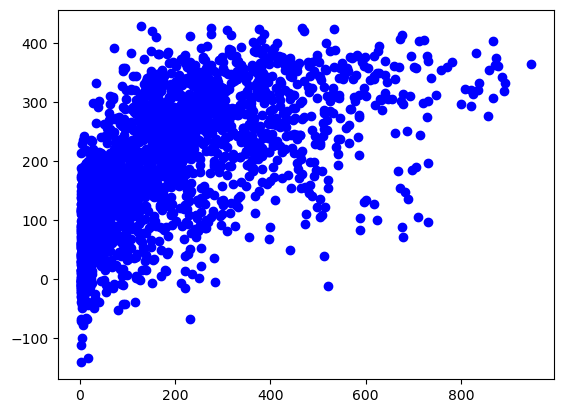

In [48]:
plt.scatter(Y_test, y_pred, color='b')